In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'USA_Housing.csv'
housing_data = pd.read_csv(file_path)

# Drop the last attribute (Price) from the dataset
data_for_clustering = housing_data.drop(columns=['Price'])

# Standardize the data for better K-Means performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Set up and apply the K-Means algorithm with 3 clusters, setting n_init explicitly to avoid the warning
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset

housing_data['Cluster'] = kmeans.labels_
# 4. Calculate Mean Squared Error (MSE)
#mse = np.mean([np.sum((data_scaled[cluster_labels == i] - kmeans.cluster_centers_[i]) ** 2) for i in range(5)])
#print("Mean Squared Error (MSE):", mse)

# Display the first few rows with the cluster labels
print(housing_data.head())

# Use PCA to reduce the data to 2 dimensions for visualization
#pca = PCA(n_components=2)
#data_2d = pca.fit_transform(data_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(housing_data[:, 0], housing_data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (K=5) with PCA-reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  Cluster  
0                          4.09      23086.80050  1.059034e+06        1  
1                          3.09      40173.07217  1.505891e+06        1  
2                          5.13      36882.15940  1.058988e+06        0  
3                          3.26      34310.24283  1.260617e+06        1  
4                          4.23      26354.10947  6.309435e+05        0  


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x700 with 0 Axes>

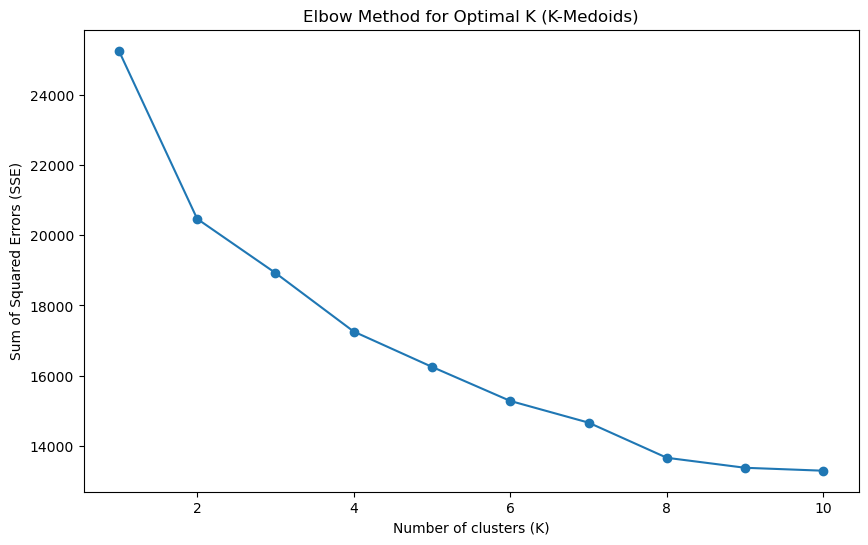

In [7]:
#!pip install scikit-learn-extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances

# Load the dataset
file_path = 'USA_Housing.csv'
housing_data = pd.read_csv(file_path)

# Drop the last attribute (Price) from the dataset
data_for_clustering = housing_data.drop(columns=['Price'])

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Define a function to compute SSE for the clustering algorithm
def calculate_sse(data, labels, medoids):
    sse = 0
    for medoid in np.unique(labels):
        # Calculate the squared errors for points in each cluster
        cluster_points = data[labels == medoid]
        sse += np.sum((pairwise_distances(cluster_points, [medoids[medoid]]) ** 2))
    return sse

# List to store SSE for each value of K
sse_values = []
K_range = range(1, 11)  # Testing K values from 1 to 10

# Loop over different values of K
for K in K_range:
    # Apply K-Medoids with the specified K value
    kmedoids = KMedoids(n_clusters=K, random_state=0)
    kmedoids.fit(data_scaled)
    
    # Calculate SSE for the current clustering
    sse = calculate_sse(data_scaled, kmedoids.labels_, kmedoids.cluster_centers_)
    sse_values.append(sse)

# Plot SSE values to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse_values, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K (K-Medoids)")
plt.show()

#k=3,5 accuracy,recall and expectation


Root Mean Square (RMS) Value: 76.78612974035961


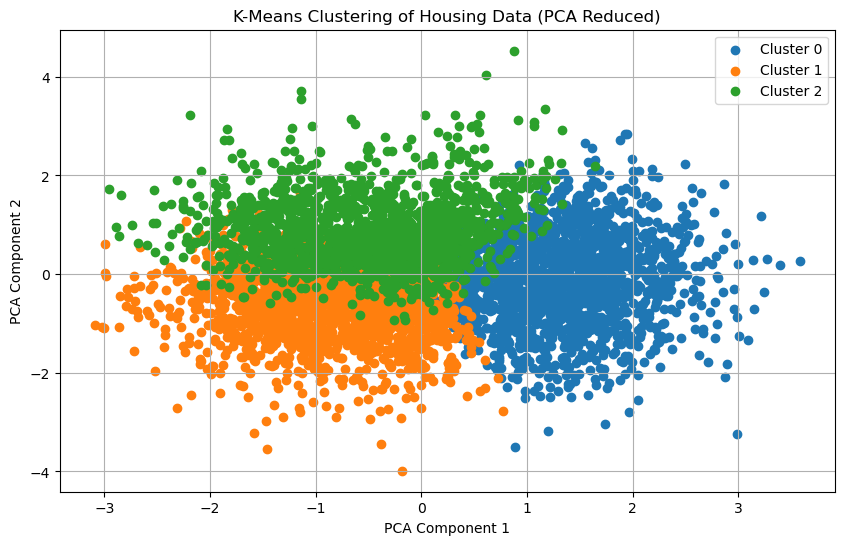

In [14]:
#Ques.01,k=3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'USA_Housing.csv'
housing_data = pd.read_csv(file_path)

# Drop the last attribute (Price) from the dataset
data_for_clustering = housing_data.drop(columns=['Price'])

# Standardize the data for better K-Means performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Set up and apply the K-Means algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset
housing_data['Cluster'] = kmeans.labels_

# Calculate the RMS value
def calculate_rms(data, labels, centers):
    rms = np.sqrt(np.mean([np.sum((data[labels == i] - centers[i]) ** 2) for i in range(len(centers))]))
    return rms

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate RMS error
rms_value = calculate_rms(data_scaled, kmeans.labels_, cluster_centers)
print("Root Mean Square (RMS) Value:", rms_value)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Create a DataFrame for the 2D data
data_2d_df = pd.DataFrame(data_2d, columns=['PCA1', 'PCA2'])
data_2d_df['Cluster'] = housing_data['Cluster']

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(data_2d_df[data_2d_df['Cluster'] == cluster]['PCA1'],
                data_2d_df[data_2d_df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
    
plt.title('K-Means Clustering of Housing Data (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

Root Mean Square (RMS) Value: 54.48651614785464


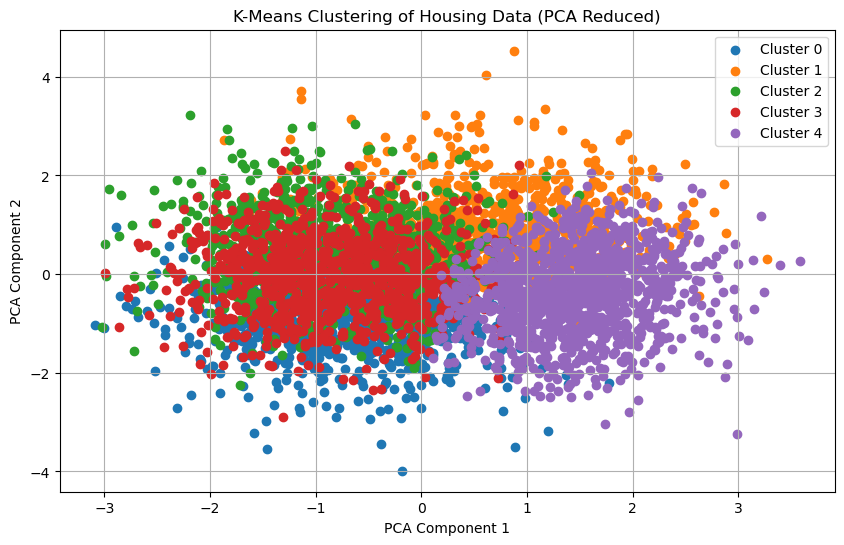

In [15]:
#Ques.01,k=5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'USA_Housing.csv'
housing_data = pd.read_csv(file_path)

# Drop the last attribute (Price) from the dataset
data_for_clustering = housing_data.drop(columns=['Price'])

# Standardize the data for better K-Means performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Set up and apply the K-Means algorithm with 3 clusters
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset
housing_data['Cluster'] = kmeans.labels_

# Calculate the RMS value
def calculate_rms(data, labels, centers):
    rms = np.sqrt(np.mean([np.sum((data[labels == i] - centers[i]) ** 2) for i in range(len(centers))]))
    return rms

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate RMS error
rms_value = calculate_rms(data_scaled, kmeans.labels_, cluster_centers)
print("Root Mean Square (RMS) Value:", rms_value)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Create a DataFrame for the 2D data
data_2d_df = pd.DataFrame(data_2d, columns=['PCA1', 'PCA2'])
data_2d_df['Cluster'] = housing_data['Cluster']

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data_2d_df[data_2d_df['Cluster'] == cluster]['PCA1'],
                data_2d_df[data_2d_df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
    
plt.title('K-Means Clustering of Housing Data (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()